In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the CSV file
df=pd.read_csv('https://raw.githubusercontent.com/kislay960/The-Sparks-Foundation/master/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Preprocessing data
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df.duplicated().sum()

17

In [5]:

df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [6]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Dropping useless Columns
df=df.drop(['Postal Code'],axis=1)
df=df.drop(['Country'],axis=1)

In [9]:

#Correlation among each other
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


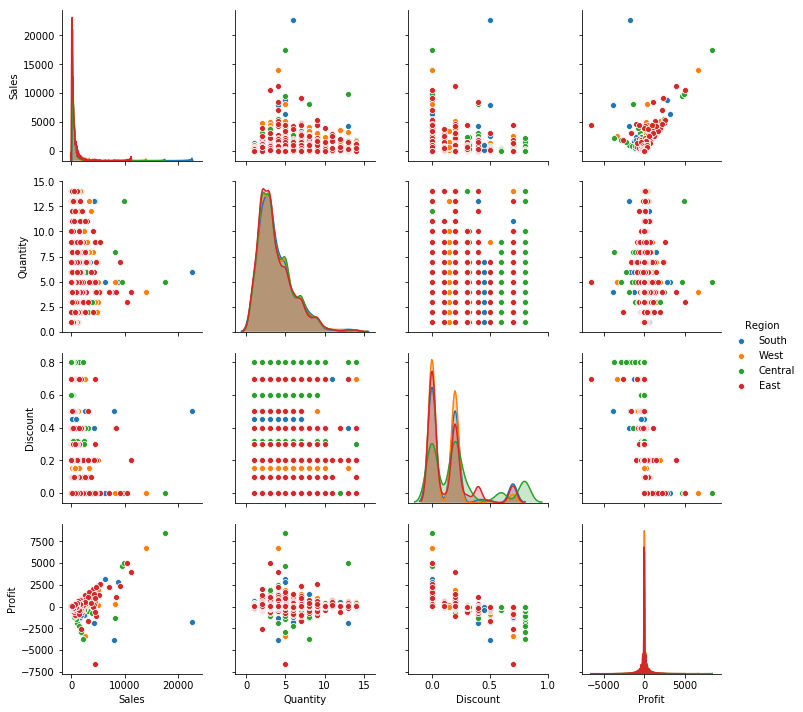

In [10]:
#Plotting pair plot for every pair
sns.pairplot(df,hue='Region')
plt.show()

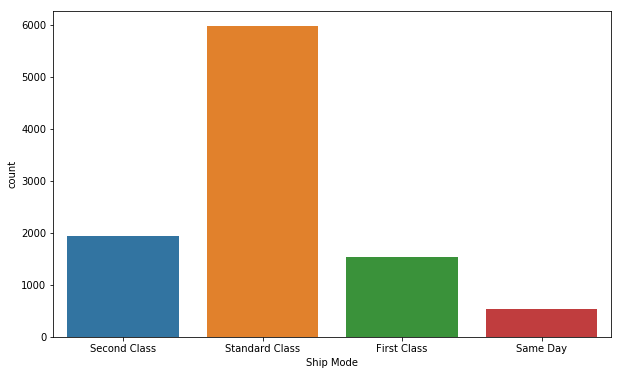

In [11]:
#Analysis of shipping mode
plt.figure(figsize=(10,6))
sns.countplot(x=df['Ship Mode'])
plt.show()

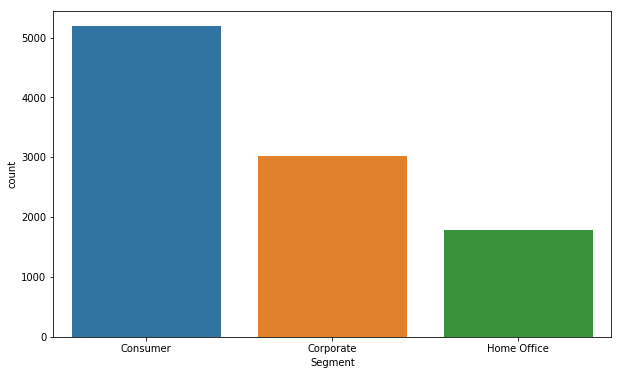

In [12]:
#Analysis of Segments
plt.figure(figsize=(10,6))
sns.countplot(x=df['Segment'])
plt.show()

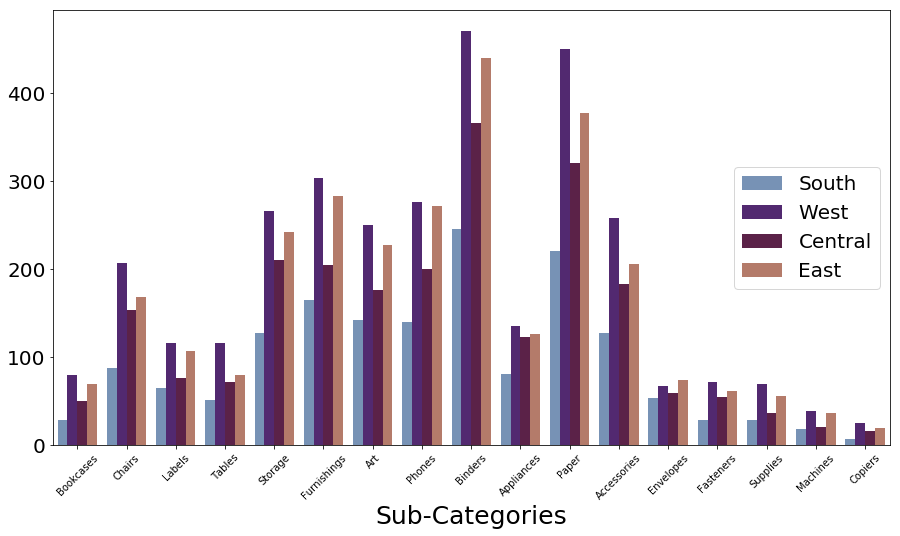

In [13]:
#Analysis of different regions
plt.figure(figsize = (15,8))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='twilight')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Sub-Categories',fontsize=25)
plt.ylabel('',fontsize=20)
plt.legend(loc=5,fontsize=20)

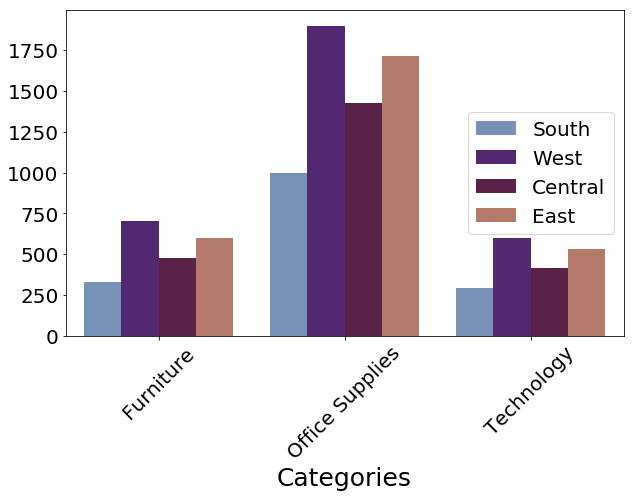

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(x='Category',hue='Region',data=df,palette='twilight')
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Categories',fontsize=25)
plt.ylabel('',fontsize=20)
plt.legend(loc=5,fontsize=20)

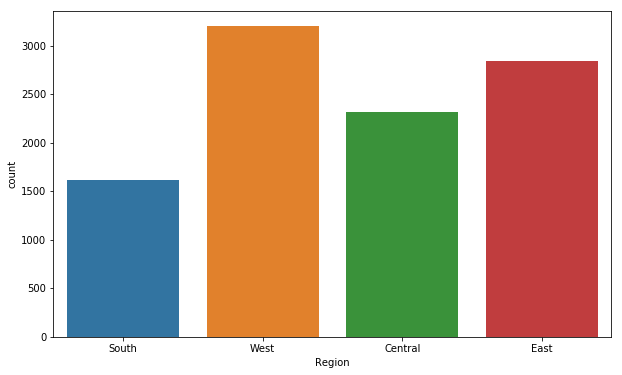

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Region'])
plt.show()

Text(0, 0.5, 'Quantities ordered')

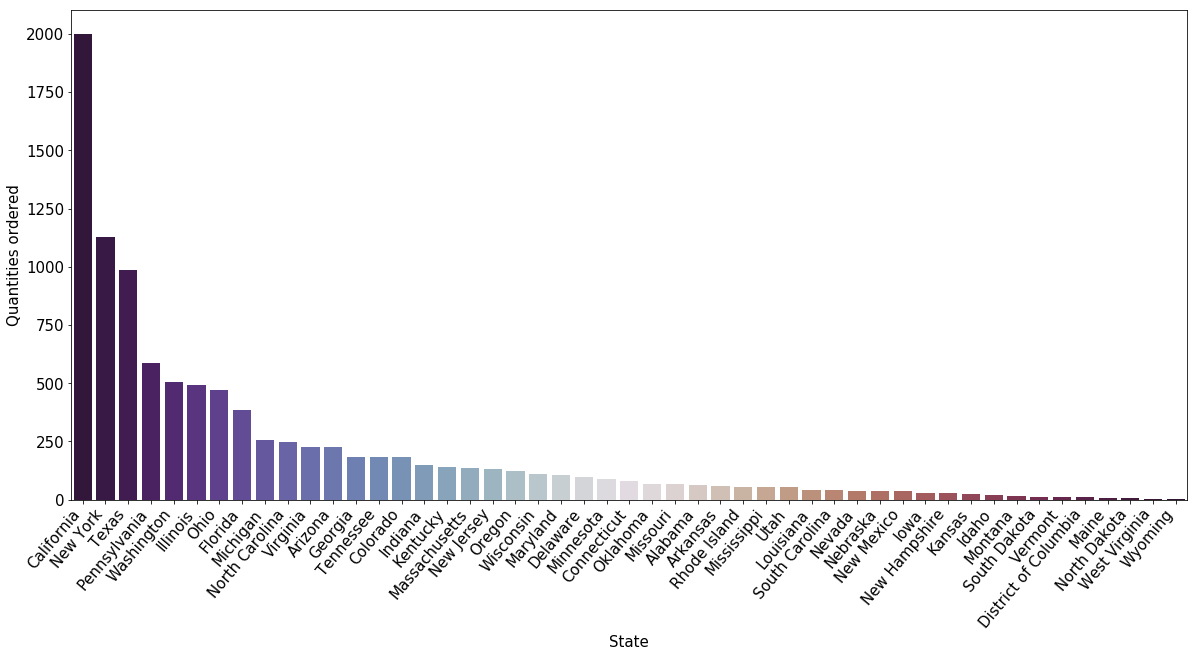

In [16]:

#Locationwise analysis
plt.figure(figsize = (20, 9))
sns.countplot(x = df['State'],palette = 'twilight_shifted', order = (df['State'].value_counts().head(50)).index)
plt.xticks(rotation=50,ha='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Quantities ordered',fontsize=15)

In [17]:
import folium
map=folium.Map(location=[37.0902,-95.7129],zoom_start=5)
states=pd.read_csv('https://raw.githubusercontent.com/kislay960/The-Sparks-Foundation/master/datasets_772_1440_statelatlong.csv')
states.head()

ModuleNotFoundError: No module named 'folium'

In [24]:
latitude = 37.0902
longitude = -95.7129
map = folium.Map(location=[latitude, longitude], zoom_start=4.2)

#Red colour for locations with loss and green for locations with profit.
def colorfunc(temp):
  if temp>0:
    return 'green'
  else:
    return 'red'

for city in states['City']:
  profit=df.loc[df['State'] == city, 'Profit'].sum()
  folium.Marker([states.loc[states['City']==city,'Latitude'].iloc[0],states.loc[states['City']==city,'Longitude'].iloc[0]],
                folium.Popup(profit),
                icon=folium.Icon(color=colorfunc(profit))).add_to(map)

NameError: name 'folium' is not defined

In [25]:
map

map

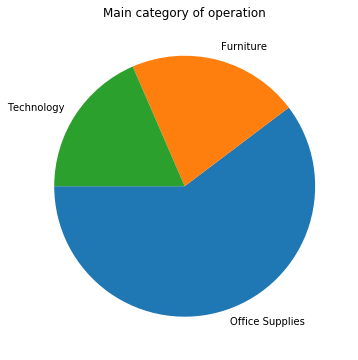

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [19]:
#Analysis of category of Operations
plt.figure(figsize=(12,6))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, startangle=180, radius=1)
plt.title('Main category of operation')
plt.show()
print (df['Category'].value_counts())

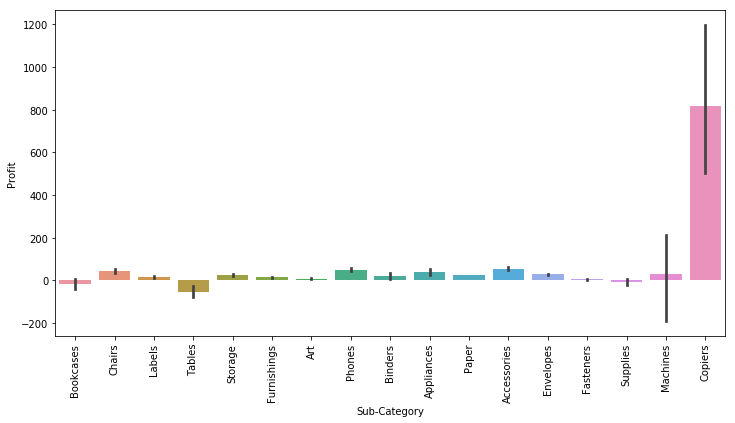

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.xticks(rotation=90)
plt.show()

Text(-4.575000000000003, 0.5, 'Profit')

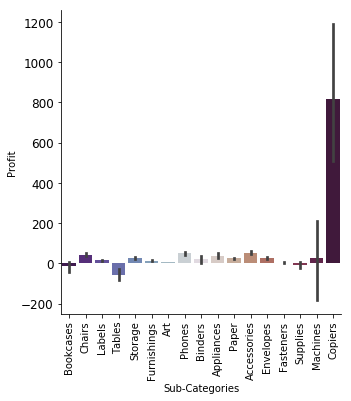

In [21]:
sns.catplot('Sub-Category','Profit',data=df,kind='bar',palette='twilight_shifted')
plt.xticks(rotation=90,size=10)
plt.yticks(size=12)
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')

ANALYSIS : From the above plot, we can analyze that every item except Copiers are not doing well in the market.